### **IMPORT LIBRARIES**

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt

### **GENERATE SYNTHETIC DATA**

In [11]:
np.random.seed(42)
n_samples = 1000

data = pd.DataFrame({
    'age': np.random.randint(20, 80, n_samples),
    'bmi': np.random.uniform(18, 40, n_samples),
    'blood_pressure': np.random.randint(80, 180, n_samples),
    'cholesterol': np.random.choice([180, 200, 220, 240, 260], n_samples),
    'glucose': np.random.choice([80, 100, 120, 140, 160], n_samples),
    'smoker': np.random.choice([0, 1], n_samples, p=[0.7, 0.3]),
    'risk': np.random.choice([0, 1], n_samples, p=[0.85, 0.15])
})

data.head()

,age,bmi,blood_pressure,cholesterol,glucose,smoker,risk
0,58,19.031722,163,180,80,0,1
1,71,23.910795,147,220,140,0,0
2,48,18.488064,86,240,160,1,0
3,34,28.959634,133,260,80,0,0
4,62,28.476635,80,200,80,0,1


### **BALANCE DATA WITH SMOTE & TRAIN / TEST SPLIT**

In [12]:
X = data.drop('risk', axis=1)
y = data['risk']

# SMOTE to balance data
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

### **TRAIN MODEL**

In [14]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### **EVALUATE**

In [15]:
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       169
           1       0.83      0.83      0.83       170

    accuracy                           0.83       339
   macro avg       0.83      0.83      0.83       339
weighted avg       0.83      0.83      0.83       339

Confusion Matrix:
 [[141  28]
 [ 29 141]]


### **SHAP EXPLAINABILITY**

✅ SHAP returned array directly


/tmp/ipython-input-16-2033795752.py:12: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, show=False)
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


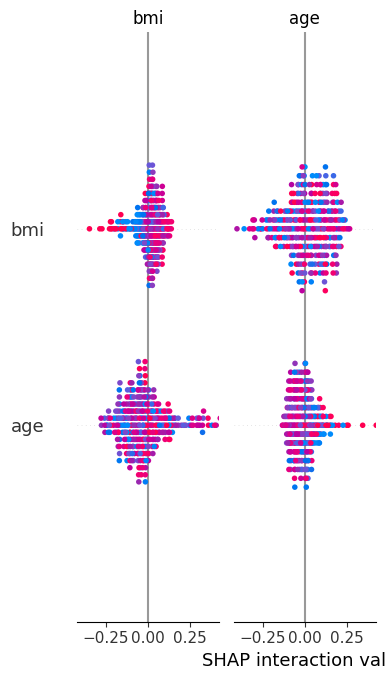

In [16]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

# Check type of shap_values
if isinstance(shap_values, list):
    # Binary classifier returning [class0, class1] shap values
    print("✅ SHAP returned a list; using positive class shap_values[1]")
    shap.summary_plot(shap_values[1], X_test, show=False)
else:
    # Direct array returned
    print("✅ SHAP returned array directly")
    shap.summary_plot(shap_values, X_test, show=False)

plt.savefig("shap_summary.png")
plt.show()

### **EXPORT CSV FOR POWER BI**

In [17]:
output = X_test.copy()
output['predicted_risk'] = y_pred
output['actual_risk'] = y_test.values
output.to_csv("patient_predictions.csv", index=False)

print("✅ patient_predictions.csv saved — ready for Power BI!")

✅ patient_predictions.csv saved — ready for Power BI!


In [18]:
from google.colab import files
files.download("shap_summary.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>